## EDA для задачи кредитного скоринга

Предоставлены данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Цель: подготовить и исследовать данные, а также предложить формулу для условной оценки надёжности клиентов исходя из предоставленных данных.

Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

In [ ]:
import pandas as pd

#### 1. Считывание файла с данными и вывод базового представления таблицы

In [ ]:
data = pd.read_csv('https://github.com/aavalina/ML/raw/390525642e8706540bd47992314c4c43f44c238f/03_EDA.csv')

In [ ]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [ ]:
data.shape

(1000, 21)

#### 2. Проверка данных на наличие пропусков. Разделение признаков на количественные, бинарные, порядковые и категориальные

In [ ]:
data.isna().any().any()

False

In [ ]:
data.dtypes

,0
status,object
duration,int64
credit_history,object
purpose,object
amount,int64
savings,object
employment_duration,object
installment_rate,object
personal_status_sex,object
other_debtors,object


In [ ]:
column_names = list(data.columns)

In [ ]:
# unique values for nonbinary and nonnumeric features
numeric_features = []
binary_features = []
for column in column_names:
  if data[column].dtype == 'int64':
    numeric_features.append(column)
  elif data[column].nunique() == 2:
    binary_features.append(column)
  else:
    print(column, data[column].unique())
    print()

status ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']

credit_history ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']

purpose ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']

savings ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']

employment_duration ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']

installment_rate ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']

personal_status_sex ['female : non-single or male : single' 'male : married/widowed'
 'female : single' 'male : divorced/separated']

other_debtors ['none' 'guarantor' 'co-applicant']

present_residence ['>= 7 yrs' '1 <= ..

In [ ]:
print('Numeric features: ', *numeric_features)
print('Binary features: ', *binary_features)

Numeric features:  duration amount age
Binary features:  people_liable telephone foreign_worker credit_risk


In [ ]:
# without using for and if
numeric_features = data.select_dtypes(include=['int64'])
print('Numeric features: ', *list(numeric_features.columns))

nonnumeric_features = data.select_dtypes(exclude=['int64'])
print('Nonnumeric features: ', *list(nonnumeric_features.columns))

binary_features = nonnumeric_features.loc[:, nonnumeric_features.nunique() == 2]
print('Binary features: ', *list(binary_features.columns))
print()

Numeric features:  duration amount age
Nonnumeric features:  status credit_history purpose savings employment_duration installment_rate personal_status_sex other_debtors present_residence property other_installment_plans housing number_credits job people_liable telephone foreign_worker credit_risk
Binary features:  people_liable telephone foreign_worker credit_risk



**Порядковые: status, savings, employment_duration, installment_rate, present_residence, property, number_credits, job**
* значения status можно упорядочить (чем больше денег у клиента, тем, наверное, вероятнее он отдаст кредит): 0 - 'no checking account' (кажется, отсутствие аккаунта - худший случай), 1 - '... < 0 DM', 2 - '0 <= ... < 200 DM', 3 - '... >= 200 DM/salary for at least 1 year'

* значения savings можно упорядочить (чем больше денег у клиента, тем, наверное, вероятнее он отдаст кредит): 0 - 'unknown/no savings account' (кажется, отсутствие аккаунта - худший случай), 1 - '... < 100 DM', 2 - '100 <= ... < 500 DM', 3 - '500 <= ... < 1000 DM', 4 - '... >= 1000 DM'

* employment_duration обозначен как порядковый в описании к датасету (и очевидно, что значения можно упорядочить: 0 - 'unemployed', 1 - '... < 1 year' и т.д.; человек без стабильной работы не сможет выплатить кредит).

* installment_rate тоже порядковый, т.к. его значения можно упорядочить: 0 - '< 20', 1 - '20 <= ... < 25', 2 - '25 <= ... < 35', 3 - '>= 35'; чем меньше ставки по кредиту, тем меньше денег нужно выплатить, тем вероятнее клиент отдаст кредит.

* present_residence: 0 - '< 1 yr', 1 - '1 <= ... < 4 yrs', 2 - '4 <= ... < 7 yrs', 3 - '>= 7 yrs' (чем дольше клиент является резидентом, тем более стабильная у него жизнь в данной стране, тем вероятнее он вернет кредит).

* значения property можно упорядочить по возрастанию стоимости: 0 - 'unknown/no property', 1 - 'car or other', 2 - 'building society savings agreement/life insurance', 3 - 'real estate'; в данном случае считаем, что в среднем недвижимость стоит дороже, чем все остальное.

* number_credits - порядковый признак, потому что чем больше кредитов у клиента, тем меньше у него денег, чтобы их все выплатить (вероятнее всего, он берет новые кредиты, чтобы выплатить предыдущие и получается замкнутый круг).

* job: 0 - 'unemployed/unskilled - non-resident', 1 - 'unskilled - resident', 2 - 'skilled employee/official', 3 - 'management/self-employed/highly qualified employee/officer'; банку должен быть интереснее резидент с более высокой зп, потому что он с большей вероятностью выплатит кредит.

\
**Категориальные: credit_history, purpose, personal_status_sex, other_debtors, other_installment_plans, housing**
* признак credit_history можно было бы отнести к порядковым, но в таком случае не совсем понятно, что лучше: 'all credits at this bank paid back duly' или 'existing credits paid back duly till now'; также непонятно, если клиент не брал кредитов, это хорошо или плохо.

* purpose относится к категориальным признакам, т.к. это просто перечисление вещей, на покупку которых клиент мог бы взять кредит.

* personal_status_sex просто описывает различные сочетания пола и статуса, которые никак нельзя проранжировать.

* то же самое с other_debtors и other_installment_plans, проранжировать не можем, поэтому это категориальные признаки.

* значения housing вряд ли можно проранжировать объективно, потому что непонятно 'for free' - это хорошо или плохо.

#### 3. Средняя сумма кредита в каждой категории

In [ ]:
data.groupby('purpose')['amount'].mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


#### 4. Какой процент клиентов моложе 30 лет снимает жилье? А какой процент клиентов старше 40 лет снимает жилье?


In [ ]:
# percentage of rent for people younger than 30
(len(data.loc[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30])) * 100

66.66666666666666

In [ ]:
# percentage of rent for people older than 40
(data.loc[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0]) * 100

68.01470588235294

#### 5. У скольких иностранцев число кредитов больше 3?

In [ ]:
data['number_credits'].value_counts()

,count
number_credits,
1,633
2-3,333
4-5,28
>= 6,6


In [ ]:
data.loc[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>=6'))].shape[0]
# нас интересуют только строки, в которых number_credits имеет значение 4-5 или больше 6

1

#### 6. numpy и matplotlib, тренировка: график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

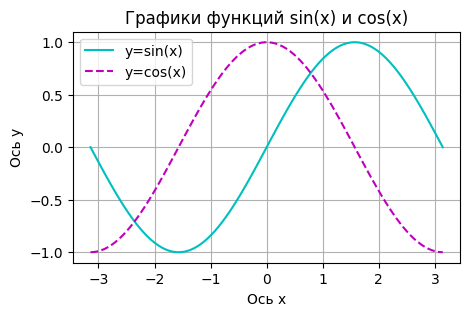

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
plt.figure(figsize=(5, 3))
plt.plot(x, np.sin(x), 'c')
plt.plot(x, np.cos(x), 'm--')
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.grid(visible=True)
plt.title('Графики функций sin(x) и cos(x)')
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.show()

# на графике видна зависимость значений функций sin(x) и cos(x) от аргумента x, принимающего действительные значения; явно выражена периодичность, функция ограничена значениями -1 и 1

#### 7. Сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Построение зеркальных горизонтальных гистограмм

In [ ]:
good_risk = data[data['credit_risk'] == 'good']
good_risk['status'].value_counts()

,count
status,
... >= 200 DM / salary for at least 1 year,348
... < 0 DM,164
no checking account,139
0<= ... < 200 DM,49


In [ ]:
bad_risk = data[data['credit_risk'] == 'bad']
bad_risk['status'].value_counts()

,count
status,
no checking account,135
... < 0 DM,105
... >= 200 DM / salary for at least 1 year,46
0<= ... < 200 DM,14


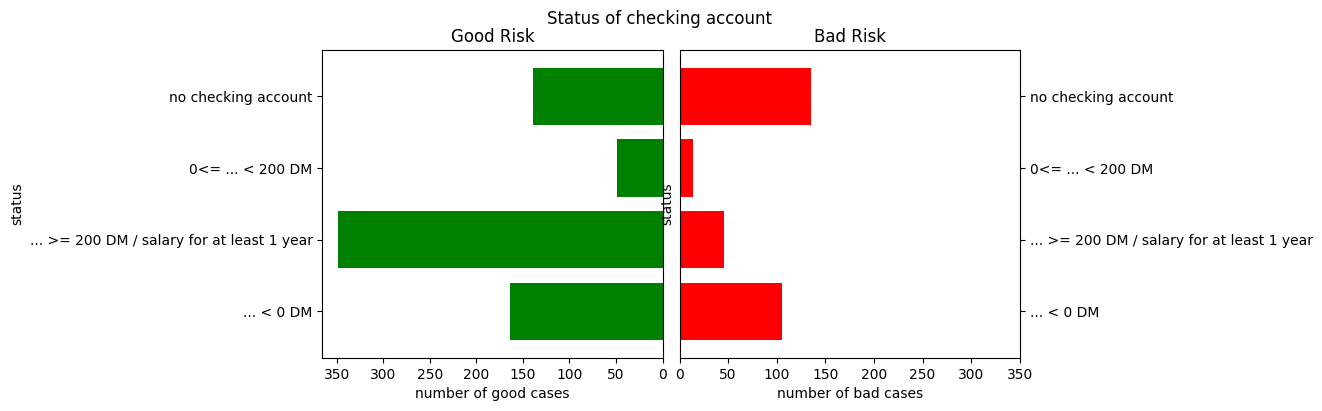

In [ ]:
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(9, 4))

plot1 = good_risk['status'].value_counts().sort_index().plot.barh(ax=plot1, width=0.8, color='green')
plot1.set_title('Good Risk')
plot1.invert_xaxis()
plot1.set_ylabel('status')
plot1.set_xlabel('number of good cases')

plot2 = bad_risk['status'].value_counts().sort_index().plot.barh(ax=plot2, width=0.8, color='red')
plot2.set_title('Bad Risk')
plot2.set_xlim(right=350)
plot2.yaxis.tick_right()
plot2.set_xlabel('number of bad cases')

fig.suptitle('Status of checking account')
fig.subplots_adjust(wspace=0.05)
fig.show()

_Можно увидеть, что количество отрицательных и положительных кейсов примерно одинаково для категории 'no checking account'. Самое большое значение имеет столбец '... >= 200 DM / salary for at least 1 year' в положительном кейсе. Самое малое значение имеет столбец '0<= ... < 200 DM' в отрицательном кейсе._

#### 8. Гистограмма для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn

In [ ]:
import seaborn as sns

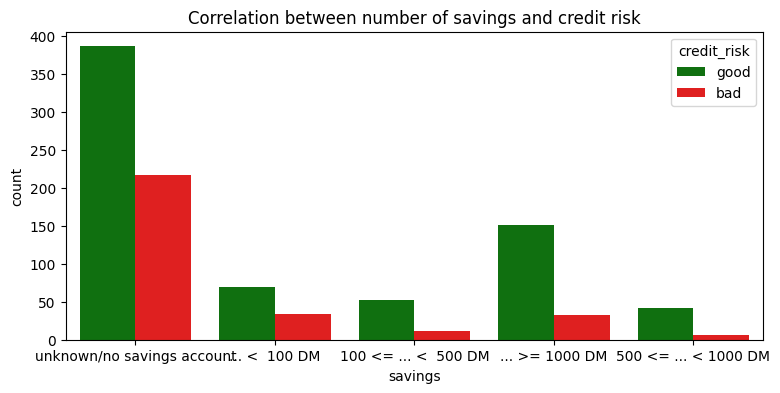

In [ ]:
plt.figure(figsize=(9, 4))
plt.title('Correlation between number of savings and credit risk')
sns.countplot(x='savings', hue='credit_risk', data=data, palette=['green', 'red'])
plt.show()

_Больше всего кейсов 'unknown/no savings account', второе место у '... >= 1000 DM', меньше всего клиентов с размерами счетов, равными '... < 100 DM', '100 <= ... < 500 DM', '500 <= ... < 1000 DM'._

#### 9. Визуализация распределения по возрасту для каждого размера сберегательного счёта

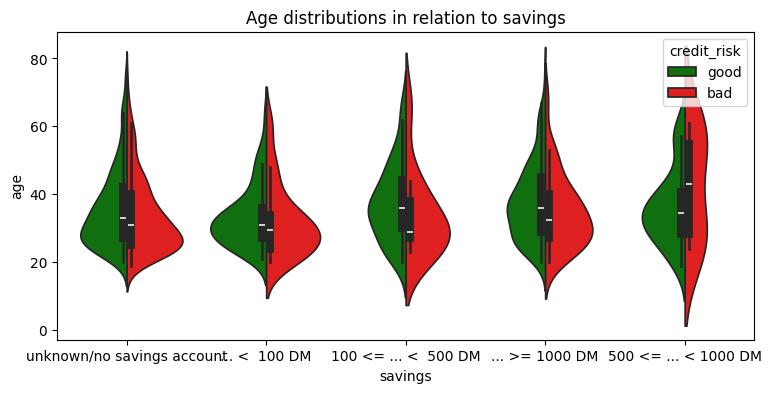

In [ ]:
plt.subplots(figsize=(9, 4))
plt.title('Age distributions in relation to savings')
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, split=True, palette=['green', 'red'])
plt.show()

_В принципе все распределения скошены в сторону более молодого возраста, большая часть клиентов имеют возраст в диапазоне от 20 до 50, только отрицательные кейсы в категории '500 <= ... < 1000 DM' имеют более равномерное распределение._

#### 10. Распределение положительных и отрицательных кейсов по возрастам, распределение всех взятых кредитов

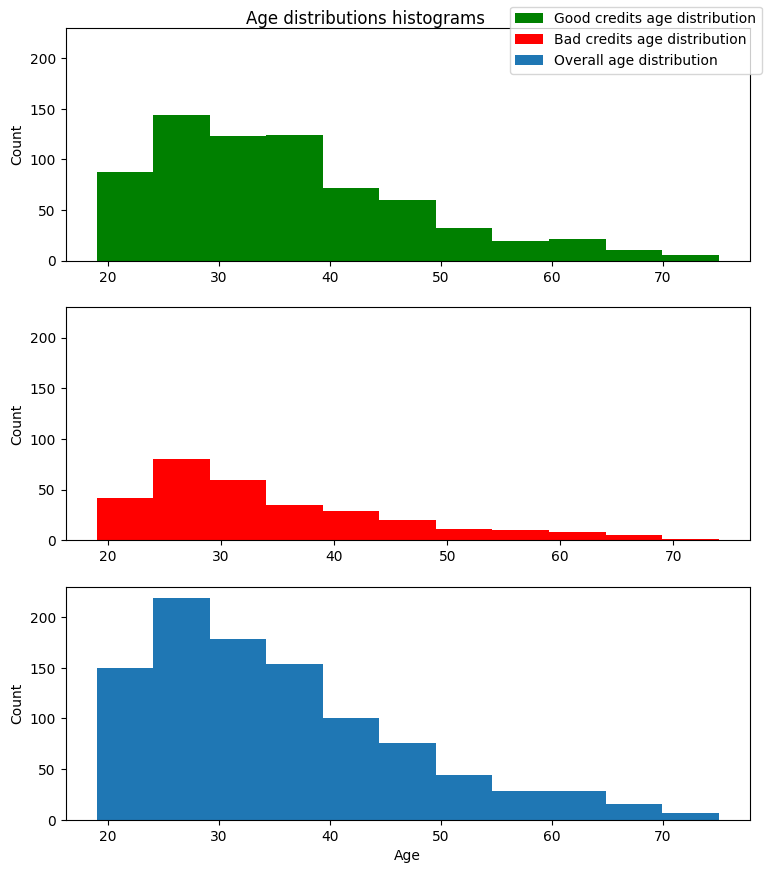

In [ ]:
good_cases = data[data['credit_risk'] == 'good']
bad_cases = data[data['credit_risk'] == 'bad']

fig = plt.figure(figsize=(8, 9))

plt.subplot(3, 1, 1)
plt.hist(good_cases['age'], bins=11, color='green')
plt.ylabel('Count')
plt.ylim(top=230)
plt.yticks([0, 50, 100, 150, 200])

plt.subplot(3, 1, 2)
plt.hist(bad_cases['age'], bins=11, color='red')
plt.ylabel('Count')
plt.ylim(top=230)
plt.yticks([0, 50, 100, 150, 200])

plt.subplot(3, 1, 3)
plt.hist(data['age'], bins=11)
plt.ylim(top=230)
plt.yticks([0, 50, 100, 150, 200])

plt.ylabel('Count')
plt.xlabel('Age')
fig.legend(['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'], loc='upper right')
fig.subplots_adjust(right=0.98, top=0.99)
fig.suptitle('Age distributions histograms', y=1.01)

fig.show()

# вывод такой же, как и в предыдущем графике

#### 11. Диаграмма рассеяния положительных и отрицательных кейсов с продолжительностью и размерами кредитов в качестве осей

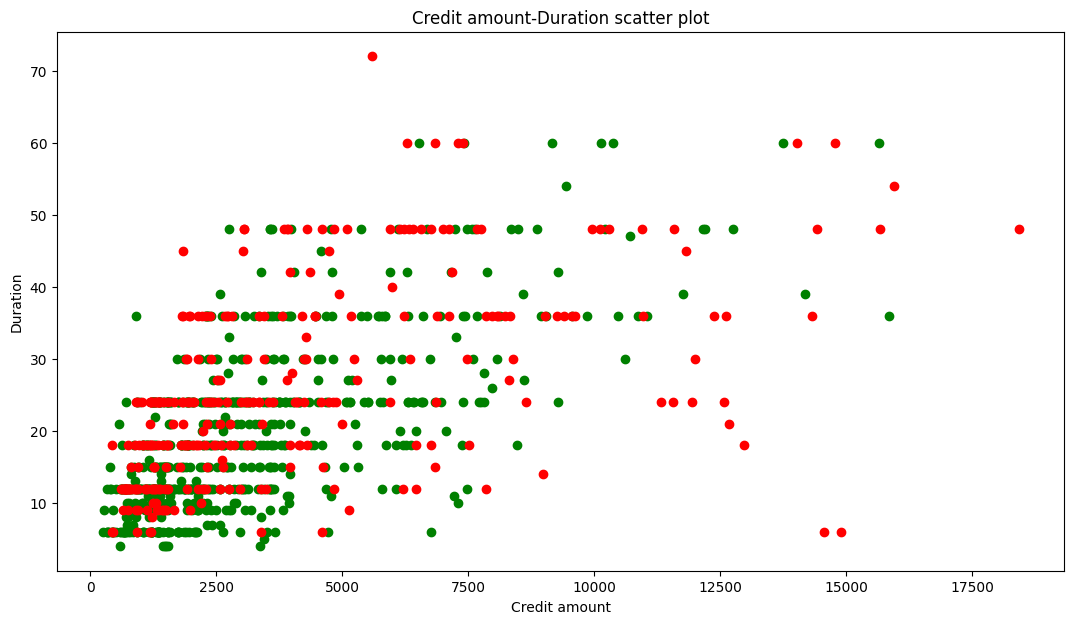

In [ ]:
good_cases = data[data['credit_risk'] == 'good']
bad_cases = data[data['credit_risk'] == 'bad']

plt.figure(figsize=(13, 7))
plt.scatter(good_cases['amount'], good_cases['duration'], color='green')
plt.scatter(bad_cases['amount'], bad_cases['duration'], color='red')
plt.ylabel('Duration')
plt.xlabel('Credit amount')
plt.title('Credit amount-Duration scatter plot')

plt.show()

_Видно, что небольшие суммы кредитов имеют небольшую продолжительность (небольшие суммы берутся в кредит на короткий период, а большие суммы берутся реже и на более длительный срок)._

#### 12. 3D версия диаграммы рассеяния с добавлением оси возраста

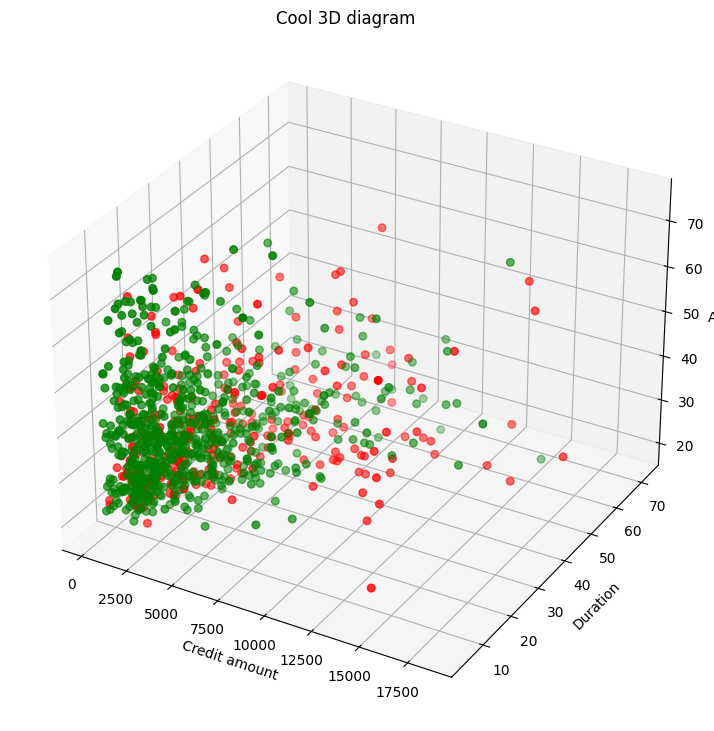

In [ ]:
good_cases = data[data['credit_risk'] == 'good']
bad_cases = data[data['credit_risk'] == 'bad']

fig = plt.figure(figsize=(9, 9))

ax = plt.axes(projection='3d', computed_zorder=False)
ax.scatter(good_cases['amount'], good_cases['duration'], good_cases['age'], color='green', s=30, zorder=2)
ax.scatter(bad_cases['amount'], bad_cases['duration'], bad_cases['age'], color='red', s=30, zorder=1)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
fig.suptitle('Cool 3D diagram', y=0.9)

plt.show()

# вывод такой же, как и на предыдущей диаграмме
# также можно заметить, что точки в основном скоплены в левом нижнем углу, где все признаки имеют небольшие значения

#### 13. Представление всех порядковых и бинарных признаков в виде числовых значений {0, ..., n - 1}, где n - это количество значений признака; избавление от категориальных признаков

In [ ]:
data.drop(columns=['credit_history', 'purpose', 'personal_status_sex', 'other_debtors',
                   'other_installment_plans', 'housing'], inplace=True)
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,car or other,21,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,unknown / no property,36,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,unknown / no property,23,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,unknown / no property,39,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,car or other,38,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
def decode_people_liable(people_liable):
  if people_liable == '0 to 2':
    return 0
  return 1


def decode_telephone(telephone):
  if telephone == 'no':
    return 0
  return 1

def decode_foreign_worker(foreign_worker):
  if foreign_worker == 'no':
    return 0
  return 1

def decode_credit_risk(credit_risk):
  if credit_risk == 'bad':
    return 0
  return 1

data['people_liable'] = data['people_liable'].apply(decode_people_liable)
data['telephone'] = data['telephone'].apply(decode_telephone)
data['foreign_worker'] = data['foreign_worker'].apply(decode_foreign_worker)
data['credit_risk'] = data['credit_risk'].apply(decode_credit_risk)

data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,car or other,21,1,skilled employee/official,0,0,0,1
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,unknown / no property,36,2-3,skilled employee/official,1,0,0,1
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,unknown / no property,23,1,unskilled - resident,0,0,0,1
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,unknown / no property,39,2-3,unskilled - resident,1,0,1,1
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,car or other,38,2-3,unskilled - resident,0,0,1,1


In [ ]:
status_mapper = {'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3}
data['status'] = data['status'].replace(status_mapper)

savings_mapper = {'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4}
data['savings'] = data['savings'].replace(savings_mapper)

employment_duration_mapper = {'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4}
data['employment_duration'] = data['employment_duration'].replace(employment_duration_mapper)

installment_rate_mapper = {'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3}
data['installment_rate'] = data['installment_rate'].replace(installment_rate_mapper)

present_residence_mapper = {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3}
data['present_residence'] = data['present_residence'].replace(present_residence_mapper)

property_mapper = {'unknown / no property': 0, 'car or other': 1, 'building soc. savings agr./life insurance': 2, 'real estate': 3}
data['property'] = data['property'].replace(property_mapper)

number_credits_mapper = {'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3}
data['number_credits'] = data['number_credits'].replace(number_credits_mapper)

job_mapper = {'unemployed/unskilled - non-resident': 0, 'unskilled - resident': 1, 'skilled employee/official': 2, 'manager/self-empl./highly qualif. employee': 3}
data['job'] = data['job'].replace(job_mapper)

data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,1,21,0,2,0,0,0,1
1,0,9,2799,0,2,2,1,0,36,1,2,1,0,0,1
2,1,12,841,1,3,2,3,0,23,0,1,0,0,0,1
3,0,12,2122,0,2,1,1,0,39,1,1,1,0,1,1
4,0,12,2171,0,2,0,3,1,38,1,1,0,0,1,1


#### 14. Реализация на основе проведённых исследований данных формулы, связывающей целевую переменную с признаками (без использования готовых инструментов машинного обучения): функции, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1)

In [ ]:
data.drop(columns=['duration', 'amount', 'employment_duration', 'installment_rate',
                   'present_residence', 'property', 'number_credits', 'job', 'people_liable',
                   'telephone', 'foreign_worker'], inplace=True)
data.head()

,status,savings,age,credit_risk
0,0,0,21,1
1,0,0,36,1
2,1,1,23,1
3,0,0,39,1
4,0,0,38,1


In [ ]:
def split_age(age):
  if 20 <= age < 40:
    return 1
  return 0

data['age'] = data['age'].apply(split_age)
data

def split_status(status):
  if status == 3 or status == 0:
    return 1
  return 0

data['status'] = data['status'].apply(split_status)

def split_savings(savings):
  if savings == 0 or savings == 4:
    return 1
  return 0

data['savings'] = data['savings'].apply(split_savings)

data.head()

,status,savings,age,credit_risk
0,1,1,1,1
1,1,1,1,1
2,0,0,1,1
3,1,1,1,1
4,1,1,1,1


In [ ]:
data.head()

,status,savings,age,credit_risk
0,1,1,1,1
1,1,1,1,1
2,0,0,1,1
3,1,1,1,1
4,1,1,1,1


In [ ]:
def predict(Xtest: np.array) -> np.array:
    return np.sum(Xtest, axis=1)//2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', axis=1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

predict(X_train)
accuracy_score(y_test, predict(X_test))

0.612